<a href="https://colab.research.google.com/github/parikshitraghav07/Projects/blob/main/Arima_maruti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy yfinance statsmodels matplotlib pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pmdarima import auto_arima

In [ ]:
# Define the ticker symbol
ticker = 'MARUTI.NS'

# Fetch historical stock data
data = yf.download(ticker, start='2015-01-01', end='2023-06-01')

# Use the adjusted closing prices
data = data[['Adj Close']].rename(columns={'Adj Close': 'Close'})

# Display the first few rows of the dataframe
data.head()

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2015-01-01,3093.800537
2015-01-02,3111.257080
2015-01-05,3192.937256
2015-01-06,3144.271729
2015-01-07,3183.630127


In [ ]:
# Fit the ARIMA model
arima_model = auto_arima(data['Close'],
                         start_p=1, start_q=1,
                         test='adf',       # Use ADF test to find optimal 'd'
                         max_p=3, max_q=3, # Set maximum p and q
                         m=1,              # Frequency of series
                         d=None,           # Let model determine 'd'
                         seasonal=False,   # No seasonality for stock prices
                         trace=True,       # Print model diagnostics
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

# Print the model summary
print(arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25507.182, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25504.631, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25505.190, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25505.210, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25504.088, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.665 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2077
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -12751.044
Date:                Sun, 02 Jun 2024   AIC                          25504.088
Time:                        16:25:13   BIC                          25509.726
Sample:                             0   HQIC                         25506.154
                               - 2077                                  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


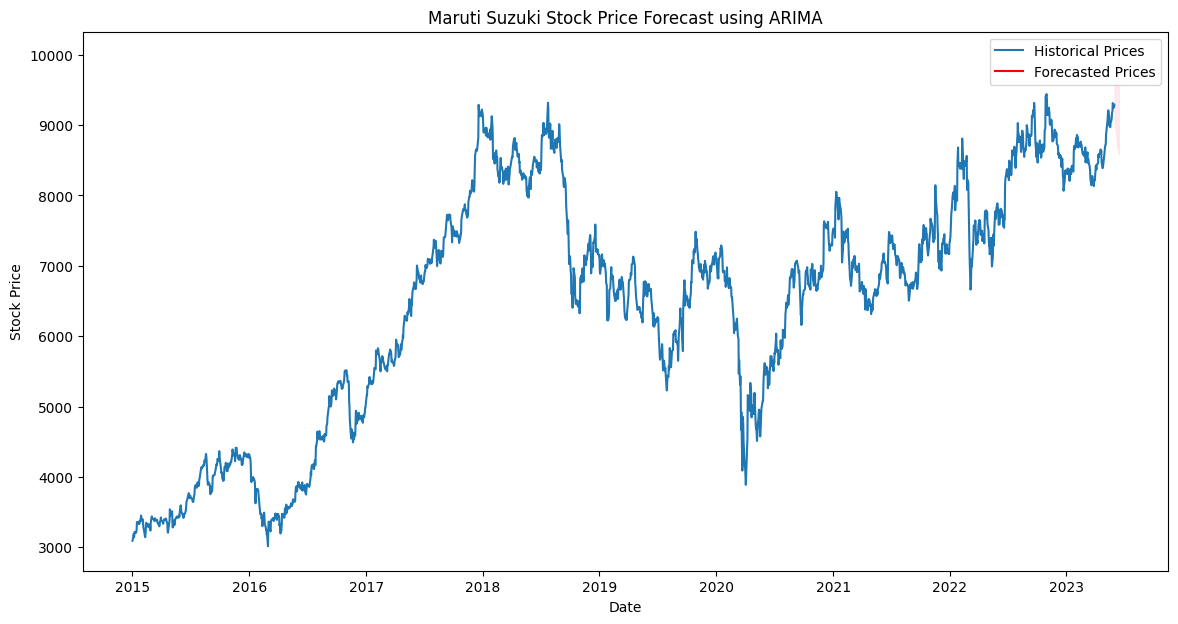

In [ ]:
# Forecast the next 10 business days
forecast_period = 10
forecast, conf_int = arima_model.predict(n_periods=forecast_period, return_conf_int=True)

# Create a DataFrame to hold the forecasted values and confidence intervals
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_period, freq='B')
forecast_df = pd.DataFrame({'Forecast': forecast,
                            'Lower CI': conf_int[:, 0],
                            'Upper CI': conf_int[:, 1]},
                           index=forecast_dates)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Historical Prices')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Prices', color='red')
plt.fill_between(forecast_df.index,
                 forecast_df['Lower CI'],
                 forecast_df['Upper CI'],
                 color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Maruti Suzuki Stock Price Forecast using ARIMA')
plt.legend()
plt.show()

In [ ]:
forecast_df

,Forecast,Lower CI,Upper CI
2023-06-01,NaN,9059.873725,9500.860650
2023-06-02,NaN,8968.542342,9592.192033
2023-06-05,NaN,8898.461307,9662.273068
2023-06-06,NaN,8839.380262,9721.354113
2023-06-07,NaN,8787.328816,9773.405559
2023-06-08,NaN,8740.270712,9820.463663
2023-06-09,NaN,8696.996319,9863.738056
2023-06-12,NaN,8656.717497,9904.016878
2023-06-13,NaN,8618.886799,9941.847576
2023-06-14,NaN,8583.105636,9977.628739
